# Exploratory Data Analysis

This notebook performs exploratory data analysis on the integrated nutrition dataset.

## Objectives
1. Load and explore the integrated dataset
2. Analyze data quality and completeness
3. Examine nutrient consumption patterns
4. Identify trends over time
5. Compare consumption across countries


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up paths
PROJECT_ROOT = Path().resolve().parent
PROCESSED_DATA_DIR = PROJECT_ROOT / "data" / "processed"

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 1. Load Integrated Dataset


In [2]:
# Load integrated dataset
integrated_path = PROCESSED_DATA_DIR / "integrated_nutrition_data.csv"

if integrated_path.exists():
    df = pd.read_csv(integrated_path, low_memory=False)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
else:
    print(f"Error: Integrated dataset not found at {integrated_path}")
    print("Please run scripts/integrate_datasets.py first to create the integrated dataset.")
    df = None


Dataset loaded successfully!
Shape: (11759401, 11)

Columns: ['Country', 'Year', 'Nutrient_Type', 'Food_Item', 'Consumption_Value', 'Consumption_Unit', 'Element', 'Area', 'Population', 'Element_fsec', 'Value']


## 2. Data Overview


In [3]:
if df is not None:
    # Display first few rows
    print("First 5 rows:")
    display(df.head())
    
    # Basic information
    print("\nDataset Info:")
    print(df.info())
    
    # Statistical summary
    print("\nStatistical Summary:")
    display(df.describe())


First 5 rows:


,Country,Year,Nutrient_Type,Food_Item,Consumption_Value,Consumption_Unit,Element,Area,Population,Element_fsec,Value
0,World,2010,Calories_kcal_per_capita_day,Grand Total,2825.19,kcal/cap/d,Food supply (kcal/capita/day),World,7.021732e+09,Value,2823
1,World,2010,Calories_kcal_per_capita_day,Grand Total,2825.19,kcal/cap/d,Food supply (kcal/capita/day),World,7.021732e+09,Value,15944.8
2,World,2010,Calories_kcal_per_capita_day,Grand Total,2825.19,kcal/cap/d,Food supply (kcal/capita/day),World,7.021732e+09,Value,8.7
3,World,2010,Calories_kcal_per_capita_day,Grand Total,2825.19,kcal/cap/d,Food supply (kcal/capita/day),World,7.021732e+09,Value,612.7
4,World,2010,Calories_kcal_per_capita_day,Grand Total,2825.19,kcal/cap/d,Food supply (kcal/capita/day),World,7.021732e+09,Value,11



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11759401 entries, 0 to 11759400
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Country            object 
 1   Year               int64  
 2   Nutrient_Type      object 
 3   Food_Item          object 
 4   Consumption_Value  float64
 5   Consumption_Unit   object 
 6   Element            object 
 7   Area               object 
 8   Population         float64
 9   Element_fsec       object 
 10  Value              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 986.9+ MB
None

Statistical Summary:


,Year,Consumption_Value,Population
count,1.175940e+07,1.175940e+07,1.175940e+07
mean,2.017732e+03,3.058011e+01,8.291643e+08
std,3.447968e+00,1.944406e+02,1.580864e+09
min,2.010000e+03,0.000000e+00,5.173390e+05
25%,2.015000e+03,5.000000e-02,7.219770e+07
50%,2.018000e+03,6.700000e-01,2.876497e+08
75%,2.021000e+03,6.510000e+00,7.460025e+08
max,2.023000e+03,3.910640e+03,8.091734e+09


## 3. Data Quality Assessment


In [5]:
if df is not None:
    # Check for missing values
    print("Missing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percentage': missing_pct
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    if len(missing_df) > 0:
        display(missing_df)
    else:
        print("No missing values found!")
    
    # Check data coverage
    print("\nData Coverage:")
    if 'Country' in df.columns:
        print(f"  Unique countries: {df['Country'].nunique()}")
    if 'Year' in df.columns:
        print(f"  Year range: {df['Year'].min()} - {df['Year'].max()}")
        print(f"  Unique years: {df['Year'].nunique()}")
    if 'Nutrient_Type' in df.columns:
        print(f"  Unique nutrient types: {df['Nutrient_Type'].nunique()}")
        print(f"  Nutrient types: {', '.join(df['Nutrient_Type'].unique())}")


Missing Values:


,Missing_Count,Missing_Percentage
Value,2714149,23.080674
Element_fsec,19534,0.166114



Data Coverage:
  Unique countries: 34
  Year range: 2010 - 2023
  Unique years: 14
  Unique nutrient types: 4
  Nutrient types: Calories_kcal_per_capita_day, Protein_g_per_capita_day, Fat_g_per_capita_day, Food_Quantity_kg_per_capita_yr


## 4. Nutrient Consumption Analysis


Nutrient Consumption Summary:


,mean,median,std,min,max
Nutrient_Type,,,,,
Calories_kcal_per_capita_day,102.63,7.90,377.85,0.0,3910.64
Fat_g_per_capita_day,3.26,0.15,12.35,0.0,181.71
Food_Quantity_kg_per_capita_yr,13.31,1.51,32.83,0.0,373.55
Protein_g_per_capita_day,3.07,0.12,11.16,0.0,126.26


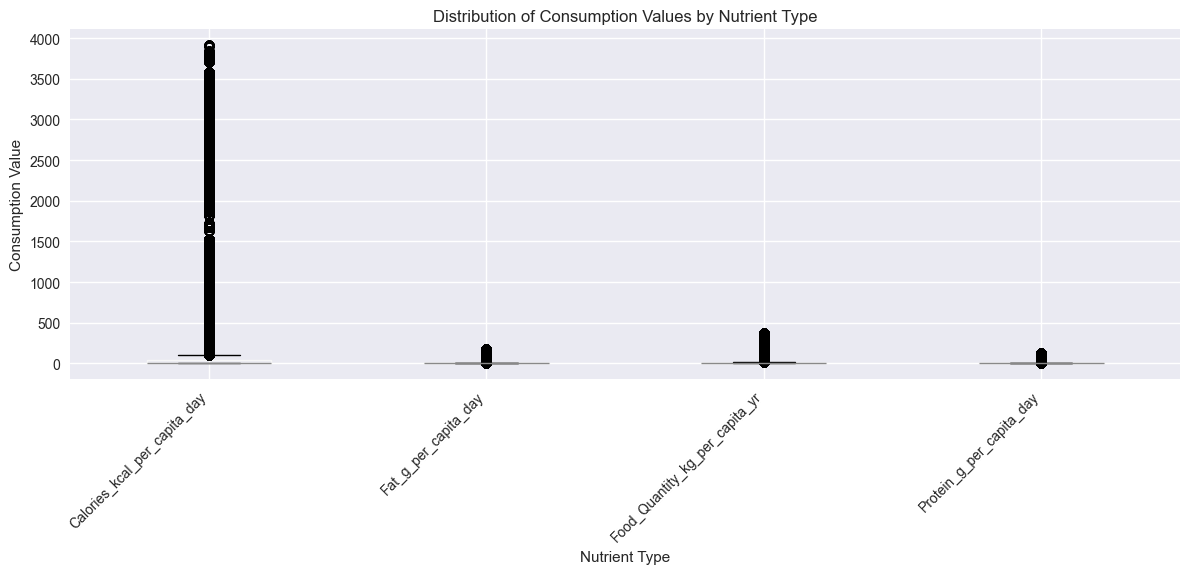

In [6]:
if df is not None and 'Nutrient_Type' in df.columns and 'Consumption_Value' in df.columns:
    # Average consumption by nutrient type
    nutrient_summary = df.groupby('Nutrient_Type')['Consumption_Value'].agg([
        'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    
    print("Nutrient Consumption Summary:")
    display(nutrient_summary)
    
    # Visualize distribution by nutrient type
    if len(df['Nutrient_Type'].unique()) > 0:
        fig, ax = plt.subplots(figsize=(12, 6))
        df.boxplot(column='Consumption_Value', by='Nutrient_Type', ax=ax)
        plt.title('Distribution of Consumption Values by Nutrient Type')
        plt.suptitle('')  # Remove default title
        plt.xlabel('Nutrient Type')
        plt.ylabel('Consumption Value')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


## 5. Temporal Trends Analysis


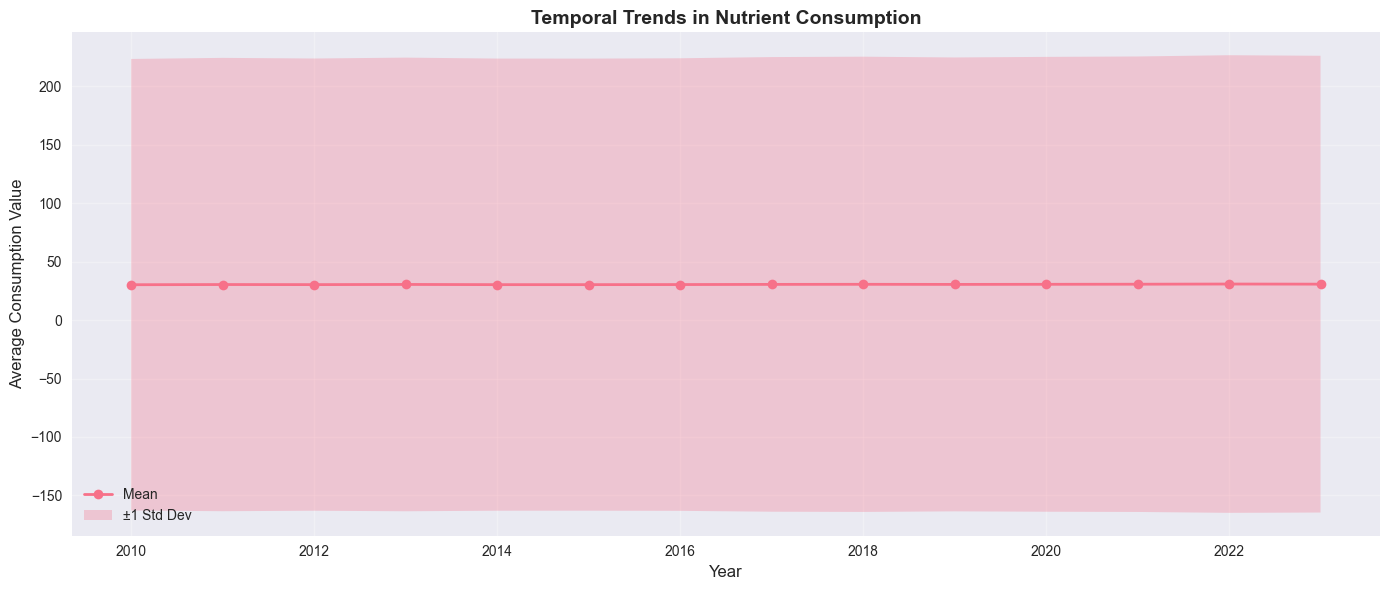


Temporal Trends Summary:


,Year,mean,median,std
0,2010,30.293829,0.66,193.258501
1,2011,30.453613,0.67,194.022549
2,2012,30.385171,0.68,193.545212
3,2013,30.536182,0.68,194.151456
4,2014,30.364696,0.65,193.510009
5,2015,30.360251,0.65,193.486317
6,2016,30.437460,0.65,193.692380
7,2017,30.576722,0.65,194.577628
8,2018,30.652418,0.67,194.840692
9,2019,30.564984,0.67,194.258469


In [7]:
if df is not None and 'Year' in df.columns and 'Consumption_Value' in df.columns:
    # Average consumption over time
    temporal_trends = df.groupby('Year')['Consumption_Value'].agg([
        'mean', 'median', 'std'
    ]).reset_index()
    
    # Plot temporal trends
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(temporal_trends['Year'], temporal_trends['mean'], marker='o', label='Mean', linewidth=2)
    ax.fill_between(
        temporal_trends['Year'],
        temporal_trends['mean'] - temporal_trends['std'],
        temporal_trends['mean'] + temporal_trends['std'],
        alpha=0.3,
        label='±1 Std Dev'
    )
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Average Consumption Value', fontsize=12)
    ax.set_title('Temporal Trends in Nutrient Consumption', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nTemporal Trends Summary:")
    display(temporal_trends.head(10))


## 6. Country Comparison


Top 10 Countries by Average Consumption:


,Country,mean,count
20,Northern America,42.809555,368940
32,Western Europe,38.920495,368627
3,Australia And New Zealand,37.657505,371010
21,Northern Europe,37.145555,373936
29,Southern Europe,36.731522,381750
11,European Union (27),36.475783,6478
10,Europe,36.091522,384022
9,Eastern Europe,35.658192,376316
1,Americas,34.280467,6514
16,Micronesia,34.087312,325861


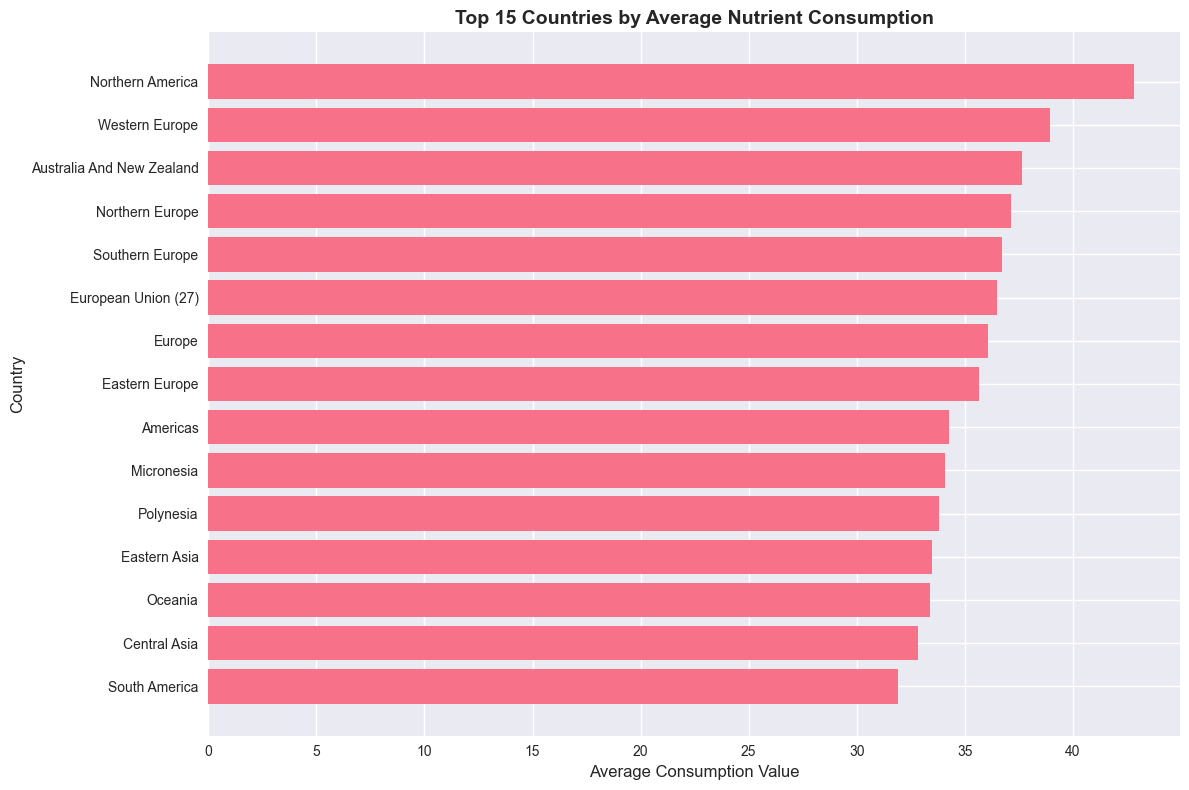

In [8]:
if df is not None and 'Country' in df.columns and 'Consumption_Value' in df.columns:
    # Top countries by average consumption
    country_summary = df.groupby('Country')['Consumption_Value'].agg([
        'mean', 'count'
    ]).reset_index()
    country_summary = country_summary.sort_values('mean', ascending=False)
    
    print("Top 10 Countries by Average Consumption:")
    display(country_summary.head(10))
    
    # Visualize top countries
    top_countries = country_summary.head(15)
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.barh(top_countries['Country'], top_countries['mean'])
    ax.set_xlabel('Average Consumption Value', fontsize=12)
    ax.set_ylabel('Country', fontsize=12)
    ax.set_title('Top 15 Countries by Average Nutrient Consumption', fontsize=14, fontweight='bold')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()


## 7. Interactive Visualization


In [9]:
if df is not None and all(col in df.columns for col in ['Year', 'Country', 'Nutrient_Type', 'Consumption_Value']):
    # Create interactive plot
    # Sample data for visualization (first country and nutrient type)
    sample_country = df['Country'].unique()[0] if len(df['Country'].unique()) > 0 else None
    sample_nutrient = df['Nutrient_Type'].unique()[0] if len(df['Nutrient_Type'].unique()) > 0 else None
    
    if sample_country and sample_nutrient:
        plot_df = df[(df['Country'] == sample_country) & (df['Nutrient_Type'] == sample_nutrient)].copy()
        plot_df = plot_df.groupby('Year')['Consumption_Value'].mean().reset_index()
        
        fig = px.bar(
            plot_df,
            x='Year',
            y='Consumption_Value',
            title=f'Nutrient Consumption Over Time - {sample_country} ({sample_nutrient})',
            labels={'Consumption_Value': 'Consumption Value', 'Year': 'Year'}
        )
        fig.update_layout(height=500)
        fig.show()
    else:
        print("Insufficient data for interactive visualization")


## 8. Summary and Next Steps

### Key Findings
- [To be filled after analysis]

### Data Quality
- [To be filled after analysis]

### Recommendations
- [To be filled after analysis]
